In [ ]:
### GPU configuration

! nvidia-smi

Sat Apr 20 16:03:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
pip install split-folders

In [ ]:
pip install keras_applications==1.0.4 --no-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.3 MB/s eta 0:00:00


In [ ]:
!unzip -u "/content/drive/MyDrive/Skincancer/r_dataset.zip" -d "/content/skincancer/"

print('\n\ndone!')

Archive:  /content/drive/MyDrive/Skincancer/r_dataset.zip
  inflating: /content/skincancer/benign/1.jpg  
  inflating: /content/skincancer/benign/10.jpg  
  inflating: /content/skincancer/benign/100.jpg  
  inflating: /content/skincancer/benign/1000.jpg  
  inflating: /content/skincancer/benign/1001.jpg  
  inflating: /content/skincancer/benign/1002.jpg  
  inflating: /content/skincancer/benign/1003.jpg  
  inflating: /content/skincancer/benign/1004.jpg  
  inflating: /content/skincancer/benign/1005.jpg  
  inflating: /content/skincancer/benign/1006.jpg  
  inflating: /content/skincancer/benign/1007.jpg  
  inflating: /content/skincancer/benign/1008.jpg  
  inflating: /content/skincancer/benign/1009.jpg  
  inflating: /content/skincancer/benign/101.jpg  
  inflating: /content/skincancer/benign/1010.jpg  
  inflating: /content/skincancer/benign/1011.jpg  
  inflating: /content/skincancer/benign/1012.jpg  
  inflating: /content/skincancer/benign/1013.jpg  
  inflating: /content/skincance

In [ ]:
import splitfolders
import os
#os.mkdir(r"C:\rafid\augmentation\covid\covid aug\photometric")

input_folder="/content/skincancer"


output="/content/new/"



splitfolders.ratio(input_folder, output, seed=42, ratio=(.8,.1,.1)) ### train 80%, val 10%, test 20%


Copying files: 3297 files [00:00, 4020.32 files/s]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


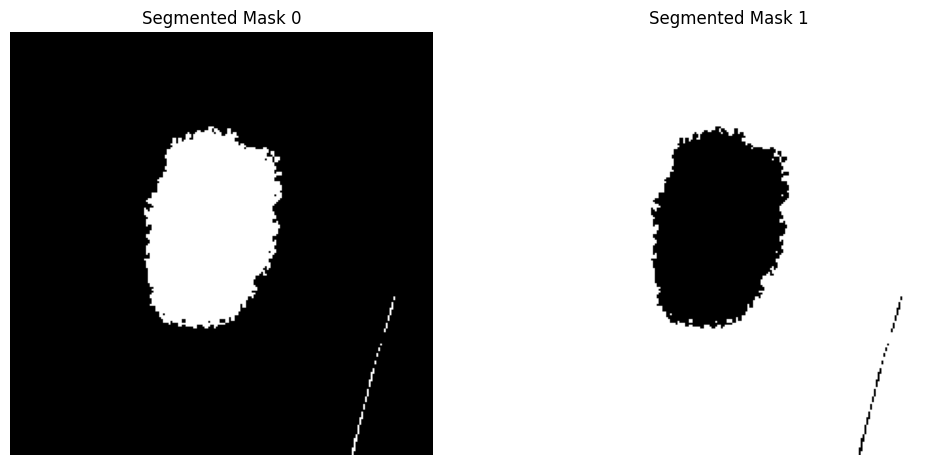

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def skin_cancer_segmentation(image_path, num_clusters=2):
    # Read the image
    img = plt.imread(image_path)

    # Flatten the image to 2D array
 -   pixels = img.reshape((-1, 3))
-
    |# Convert to float32
    pixels = np.float32(pixels)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixels)

    # Get the labels for each pixel
    segmented_img = kmeans.labels_.reshape(img.shape[0], img.shape[1])

    # Create masks for each cluster
    masks = []
    for label in range(num_clusters):
        mask = np.where(segmented_img == label, 1, 0)
        masks.append(mask)

    return masks

# Example usage:
image_path = "/content/new/train/benign/100.jpg"
num_clusters = 2  # Benign and malignant
masks = skin_cancer_segmentation(image_path, num_clusters)

# Save the output of segmented mask 1
segmented_mask_1 = masks[1]  # Assuming mask 1 corresponds to benign
plt.imsave("segmented_mask_1.png", segmented_mask_1, cmap='gray')

# Display the segmented masks
plt.figure(figsize=(12, 6))
for i, mask in enumerate(masks):
    plt.subplot(1, num_clusters, i+1)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Segmented Mask {i}")
    plt.axis('off')

plt.show()


In [ ]:
import os

def process_images_in_folder(input_folder, output_folder, class_name, num_clusters=2):
    # Create the class output folder if it doesn't exist
    class_output_folder = os.path.join(output_folder, class_name)
    if not os.path.exists(class_output_folder):
        os.makedirs(class_output_folder)

    # Get the list of image files in the input folder
    image_files = os.listdir(input_folder)

    # Process each image in the folder
    for image_file in image_files:
        # Get the full path of the image
        image_path = os.path.join(input_folder, image_file)

        # Perform segmentation
        masks = skin_cancer_segmentation(image_path, num_clusters)

        # Save the segmented mask with the same name as the input image
        output_path = os.path.join(class_output_folder, image_file)
        segmented_mask = masks[1]  # Assuming mask 1 corresponds to malignant
        plt.imsave(output_path, segmented_mask, cmap='gray')

# Example usage:
input_benign_folder = "/content/skincancer/benign"
input_malignant_folder = "/content/skincancer/malignant"
output_segmented_folder = "/content/drive/MyDrive/Skincancer/malignant_mask"

# Process images in the benign folder and save segmented masks into a folder named "benign"
process_images_in_folder(input_benign_folder, output_segmented_folder, "benign")

# Process images in the malignant folder and save segmented masks into a folder named "malignant"
process_images_in_folder(input_malignant_folder, output_segmented_folder, "malignant")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/py

In [ ]:
import cv2
import os

def perform_bitwise_operation(mask_folder, raw_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get the list of files in the mask folder
    mask_files = os.listdir(mask_folder)

    # Iterate through each mask file
    for mask_file in mask_files:
        # Load the mask image
        mask_path = os.path.join(mask_folder, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Load the corresponding raw image
        raw_path = os.path.join(raw_folder, mask_file)  # Assuming the raw image has the same name
        raw = cv2.imread(raw_path)

        # Perform bitwise AND operation
        segmented_image = cv2.bitwise_and(raw, raw, mask=mask)

        # Save the segmented image
        output_path = os.path.join(output_folder, mask_file)
        cv2.imwrite(output_path, segmented_image)

# Example usage
mask_folder = "/content/drive/MyDrive/Skincancer/malignant_mask/malignant"
raw_folder = "/content/skincancer/malignant"
output_folder = "/content/drive/MyDrive/Skincancer/M_seg"

perform_bitwise_operation(mask_folder, raw_folder, output_folder)


In [ ]:
import cv2
import os
import pandas as pd

dirr1 = r"/content/drive/MyDrive/Skincancer/M_seg"
csv = r"/content/drive/MyDrive/Skincancer/Malignant.csv"
c = 0

j = 0
df1 = pd.DataFrame(columns=['class', 'Solidity', 'sift_keypoints', 'wh_ratio', 'ecl_ratio', 'harris_corner', 'circularity'])

for i in os.listdir(dirr1):
    path = os.path.join(dirr1, i)
    img = cv2.imread(path)
    print('working on img', i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray, 150, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if contours:  # Check if contours are found
        cnt = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(cnt)
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)

        if hull_area == 0:
            print("Warning: Convex hull area is zero for image", i)
            continue  # Skip this image and move to the next one

        Solidity = float(area) / hull_area
        perimeter = cv2.arcLength(cnt, True)
        circularity = ((4 * 3.1416 * area) / (perimeter ** 2))

        sift = cv2.SIFT_create()
        kp = sift.detect(gray, None)
        sift_keypoints = len(kp)

        x, y, w, h = cv2.boundingRect(cnt)
        wh_ratio = w / h

        M = cv2.moments(thresh)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        center_coordinates = (cX, cY)
        w = int(w / 2)
        h = int(h / 2)
        axesLength = (w, h)
        angle = 0
        startAngle = 0
        endAngle = 360
        color = (0, 0, 255)
        thickness = -1
        eclipse = cv2.ellipse(img, center_coordinates, axesLength, angle, startAngle, endAngle, color, thickness)
        lower_blue = np.array([0, 0, 222])
        upper_blue = np.array([0, 0, 255])
        mask_blue = cv2.inRange(eclipse, lower_blue, upper_blue)
        contours, hierarchy = cv2.findContours(mask_blue, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        try:
            ecl_cnt = max(contours, key=cv2.contourArea)
            ecl_area = cv2.contourArea(ecl_cnt)
            ecl_ratio = area / ecl_area,l
        except:
            ecl_ratio = 0

        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray, 5, 3, 0.04)
        ret, dst = cv2.threshold(dst, 0.1 * dst.max(), 255, 0)
        dst = np.uint8(dst)
        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        corners = cv2.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)
        harris_corner = len(corners)

        df1.loc[j] = ({'class': c, 'Solidity': Solidity, 'sift_keypoints': sift_keypoints, 'wh_ratio': wh_ratio,
                       'ecl_ratio': ecl_ratio, 'harris_corner': harris_corner, 'circularity': circularity})
        j += 1
    else:
        print("No contours found for image", i)

frames = df1
frames.to_csv(csv, index=False)


working on img 498.jpg
working on img 817.jpg
working on img 326.jpg
working on img 520.jpg
working on img 137.jpg
working on img 1452.jpg
working on img 808.jpg
working on img 1214.jpg
working on img 632.jpg
No contours found for image 632.jpg
working on img 607.jpg
working on img 557.jpg
working on img 383.jpg
working on img 1437.jpg
working on img 588.jpg
No contours found for image 588.jpg
working on img 4.jpg
working on img 241.jpg
working on img 48.jpg
working on img 877.jpg
working on img 146.jpg
working on img 1017.jpg
working on img 365.jpg
working on img 361.jpg
working on img 1433.jpg
working on img 1111.jpg
working on img 575.jpg
working on img 1189.jpg
working on img 194.jpg
working on img 942.jpg
working on img 1392.jpg
working on img 447.jpg
working on img 916.jpg
working on img 387.jpg
working on img 819.jpg
working on img 56.jpg
working on img 38.jpg
working on img 1014.jpg
working on img 86.jpg
working on img 993.jpg
working on img 1028.jpg
working on img 124.jpg
work